Connected to integrating (Python 3.11.5)

In [1]:
import sys
ROOT = '../'
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/")
sys.path.append(ROOT)

from Final_surface import *

In [2]:
!pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2020/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo2020/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/gentoo/generic, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic


In [3]:
from PointList import *
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm
import math


In [3]:
# from PointList import *
# from Triangle import *
# from tqdm import tqdm
# from copy import *


# class TriangularMesh:
#     def __init__(self, boundary : PointList, desired_triangle_count):
#         self.boundary = boundary 
#         self.m = desired_triangle_count
#         self.mesh = []
#         self.n = len(boundary.points)
#         self.v_indexes = [] #the vertexes indices
#         self.mapping = [] #contains the mapping from I(v_indexes) to R^3
#         self.triangles  = []  #each triangle is a tuple
#         self.inside_indexes  = []
#         self.N = {} #les indices des voisins 
#         self.N_vertexes = len(self.v_indexes) # the number of nodes in the meshing
#         self.w = np.empty((len(self.v_indexes),len(self.v_indexes)))
#         self.dict_vertexes = {} # contains the dict of all triangles associated to an index
#         self.edges = set()
#         self.vertex_curvatures = dict()
    

#     def add_points_to_boundary(self,N = 10):
#         "adding points to the boundary"
#         K = deepcopy(self.boundary.points)
#         R = []
#         for i in tqdm(range(len(self.boundary.points))):
            
#             p1 = K[i-1]
#             p2 = K[i]
#             L = list(np.linspace(p1,p2,N+2))[1:-1]

#             R.append(p1)
#             R = R + L
#         self.boundary.points = R
#         self.n = len(self.boundary.points)



#     def compute_central_point(self):
#         return self.boundary.average_point()
        
         
#     def create_initial_subdivisions(self):
#         #  Create initial subdivisions using the central point
#         C = self.compute_central_point()
#         s = int(self.m/(2*self.n) - 1/2)
#         triangle = self.boundary.points + [self.boundary.points[0]]
#         P = [triangle]
#         for j in range(1,s+1):
#             P_j = triangle + (j / (s+1))*(C - triangle)
#             P.append(P_j)
        
#         return np.array(P)
        

#     def create_quadrilaterals(self):
#         #split the outside quadrilaterals
#         P = self.create_initial_subdivisions()
#         s = int(self.m/(2*self.n) - 1/2)
#         for j in tqdm(range(s)) : 
#             for i in range(self.n) :
#                 self.mesh.append([P[j,i],P[j+1,i+1],P[j,i+1]])
#                 self.mesh.append([P[j,i],P[j+1,i+1],P[j+1,i]])
        
        


#     def split_quadrilateral(self):
#         C = self.compute_central_point()
#         P = self.create_initial_subdivisions()
#         for i in tqdm(range(self.n)) :
#             self.mesh.append([C,P[-1,i],P[-1,i+1]])

#     def further_subdivide(self):
#         while len(self.mesh) < self.m :
#             k = np.random.randint(0,len(self.mesh))
#             tri = np.array(self.mesh.pop(k))
#             C = np.mean(tri,axis = 0)
#             tri1 = [tri[0],tri[1],C]
#             tri2 = [tri[0],tri[2],C]
#             tri3 = [tri[1],tri[2],C]
#             self.mesh += [tri1,tri2,tri3]
    



#     def generate_mesh_initial(self):
#         self.create_quadrilaterals()
#         # self.further_subdivide()
#         return self.mesh


#     def modify_N(self,i):
#         N = []
#         for tr in self.triangles :
#             if i in tr:
#                 N += list(tr)
#         self.N[i] = list(set(N))
#         self.N[i].remove(i)


#     def canonic_representation_from_mesh(self):
#         K = np.array(self.mesh).reshape(-1,3)
#         K = [tuple(x) for x in K]
#         N = len(set(K))
#         self.N_vertexes = N
#         self.w = np.empty((N,N))
#         self.v_indexes = list(range(N))
#         self.mapping = list(set(K))
#         for j in self.v_indexes:
#             self.dict_vertexes[j] = []
#         self.triangles = []
#         for tri in self.mesh:
#             triangle = [self.mapping.index(tuple(pt)) for pt in tri]
#             self.triangles.append(tuple(sorted(triangle)))
#             self.dict_vertexes[triangle[0]].append(tuple(sorted(triangle)))
#             self.dict_vertexes[triangle[1]].append(tuple(sorted(triangle)))
#             self.dict_vertexes[triangle[2]].append(tuple(sorted(triangle)))

#         for i in self.v_indexes:
#             self.modify_N(i)

#         Outside = [tuple(k) for k in self.boundary.points]
#         Outside_vertexes = [self.mapping.index((pt)) for pt in Outside]
#         self.inside_indexes = list(set(self.v_indexes) - set(Outside_vertexes))

    
#     def tuple_mapping(self):
#         self.mapping = [tuple(k) for k in self.mapping]

            
#     def clean_triangles(self):
#         pass

#     def area_3D(self,tr):
#         v = [self.mapping[tr[0]],self.mapping[tr[1]],self.mapping[tr[2]]]
#         return area_3D(v)


#     def _N(self,i):
#         N = []
#         for tr in self.triangles :
#             if i in tr:
#                 N += list(tr)
#         return list(set(N))








#     def cotangent_angle(self, p1, p2, p3):
#         """Compute the cotangent of the angle between p1-p2 and p1-p3."""
#         v1 = np.array(self.mapping[p2]) - np.array(self.mapping[p1])
#         v2 = np.array(self.mapping[p3]) - np.array(self.mapping[p1])
#         dot_product = np.dot(v1, v2)
#         cross_product_norm = np.linalg.norm(np.cross(v1, v2))
#         return dot_product / cross_product_norm

#     def voronoi(self,p1,p2,p3):
#         """Compute vornoi area at point p"""

#         p = np.array(self.mapping[p1])
#         q = np.array(self.mapping[p2])
#         r = np.array(self.mapping[p3])
#         pr = np.linalg.norm(p-r)**2
#         pq = np.linalg.norm(p-q)**2
#         cot_q = self.cotangent_angle(p2,p3,p1)
#         cot_r = self.cotangent_angle(p3,p1,p2)
    
#         return (pr*cot_q + pq*cot_r)/8
    

#     def is_obtuse(self,p1, p2,p3):
#         v1 = self.mapping[p1]
#         v2 = self.mapping[p2]
#         v3 = self.mapping[p3]
#         # Compute squared lengths of the sides
#         a2 = (v2[0]-v3[0])**2 + (v2[1]-v3[1])**2 + (v2[2]-v3[2])**2
#         b2 = (v1[0]-v3[0])**2 + (v1[1]-v3[1])**2 + (v1[2]-v3[2])**2
#         c2 = (v1[0]-v2[0])**2 + (v1[1]-v2[1])**2 + (v1[2]-v2[2])**2

#         # Check if any angle is obtuse
#         return a2 > b2 + c2 or b2 > a2 + c2 or c2 > a2 + b2


#     def obtuse_at_point(self,p1, p2,p3):
#         v1 = self.mapping[p1]
#         v2 = self.mapping[p2]
#         v3 = self.mapping[p3]
#         # Compute squared lengths of the sides
#         a2 = (v2[0]-v3[0])**2 + (v2[1]-v3[1])**2 + (v2[2]-v3[2])**2
#         b2 = (v1[0]-v3[0])**2 + (v1[1]-v3[1])**2 + (v1[2]-v3[2])**2
#         c2 = (v1[0]-v2[0])**2 + (v1[1]-v2[1])**2 + (v1[2]-v2[2])**2

#         # Check if any angle is obtuse
#         return a2 > b2 + c2 
    

#     def mixed_area(self,v1,v2,v3):
#         " calculate the voronoi mixed area at v1 "
#         if not self.is_obtuse(v1,v2,v3): # checks that the triangle is not obtuse
#             return self.voronoi(v1,v2,v3)
#         else:
#             tr = (v1,v2,v3)
#             if self.obtuse_at_point(v1,v2,v3):
                
#                 return self.area_3D(tr)/2
#             else:
#                 return self.area_3D(tr)/4

#     def voronoi_area(self, vertex):
#         """Compute the total area of triangles adjacent to the vertex."""
#         area = 0
    
#         triangles = self.dict_vertexes[vertex]
#         for tri in triangles:
#             v1 = vertex
#             v2 = [a for a in tri if a != vertex][0]
#             v3 = [a for a in tri if a != vertex][1]
#             tr = (v1,v2,v3)
#             area += self.area_3D(tr)
#         return area


#     def compute_mean_curvature(self):
#         """Compute the mean curvature for each vertex in the mesh."""
#         self.vertex_curvatures = dict()
#         for i in self.inside_indexes:

#             A_i = self.voronoi_area(i) #We do it with simple area
#             curvature_sum = np.zeros(3)
#             B_i  = 0
#             for j in self.N[i]:
                
#                 tr_i = set(self.dict_vertexes[i])
#                 tr_j = set(self.dict_vertexes[j])

#                 t1= list(tr_i.intersection(tr_j))[0]
#                 t2= list(tr_i.intersection(tr_j))[1]
                

#                 alpha = [r for r in t1 if r not in (i,j)][0]
#                 beta = [r for r in t2 if r not in (i,j)][0]

#                 cot_alpha = self.cotangent_angle(alpha,i,j)
#                 cot_beta = self.cotangent_angle(beta,j,i)

#                 p_i = np.array(self.mapping[i]) 
#                 p_j = np.array(self.mapping[j]) 

#                 curvature_sum += (cot_alpha + cot_beta) *(p_j - p_i)
                
#                 if A_i < 0:
#                     print(A_i,i)
#                     raise Exception("Error this area si negative !!!")
                    

            
#             h_i = np.linalg.norm(curvature_sum) / (4 * A_i)
#             self.vertex_curvatures[h_i] = i
#         A = np.array(list(self.vertex_curvatures.keys()))
        
#         return np.max(A)



## The Catenoid loop

In [4]:
def catenoid(u,v,c=1):
    return (c*np.cosh(v/c)*np.cos(u),c*np.cosh(v/c)*np.sin(u),v)

In [5]:
R = []
S2 = []
S1 = []
S3 = []
S4 = []

U = np.linspace(-3*np.pi/5,3*np.pi/5,2)
V = np.linspace(-10,10,15)
c = 5
polygone = PointList()

for u in [-3*np.pi/5]  :
    for v in V :
        S2.append(catenoid(u,v,c))
S2.reverse()
for u in [3*np.pi/5]  :
    for v in V :
        S3.append(catenoid(u,v,c))


U = np.linspace(-3*np.pi/5,3*np.pi/5,65)
V = np.linspace(-10,10,15)

for u in U :
    S1.append(catenoid(u,V[0],c))

for u in U :
    S4.append(catenoid(u,V[-1],c))

S4.reverse()



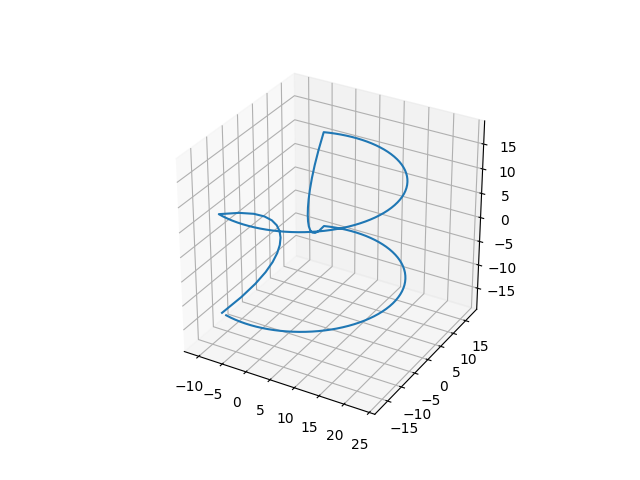

In [6]:
X = []
Y = []
Z = []
S = S1[1:] + S3[1:] + S4[1:] + S2[1:] 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

L = np.array(S)
xs = L[:,0]
ys = L[:,1]
zs = L[:,2]

X = X + list(xs)
Y = Y + list(ys)
Z = Z + list(zs)

plt.plot(xs,ys,zs)


X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)


polygone.points = S


In [7]:
from Final_surface import *

In [8]:
#intialize the first mesh
from copy import *

polygone = PointList()
for k in S:
    polygone.add_point(k)
""
M = Edge_Flipping(polygone,2040)
# M.add_points_to_boundary(N = 5)
M.create_quadrilaterals()
M.split_quadrilateral()

M.canonic_representation_from_mesh()
M.clean_triangles()
M.fill_edges()

Outside = [tuple(k) for k in M.boundary.points]
Outside_vertexes = [M.mapping.index((pt)) for pt in Outside]
Inside_vertexes = list(set(M.v_indexes) - set(Outside_vertexes))

centre = M.compute_central_point()
centre = tuple(centre)
ind = M.mapping.index(centre)
triangle_centre = M.dict_vertexes[ind]
M.update_weights()
# Fliaring Laplace 
# epsilon = 0.01
# area = M.calculate_area()
# M.update_weights()
# for i in Inside_vertexes:
#     M.update_mapping(i)
# M.lawson_flip()

# new_area = M.calculate_area()
# while area - new_area >= epsilon:
#     area = M.calculate_area()
#     M.update_weights()
#     for i in Inside_vertexes:
#         M.update_mapping(i)
#     M.lawson_flip()
    
#     new_area = M.calculate_area()
    
#     print(new_area,area - new_area,M.compute_mean_curvature(),M.vertex_curvatures[M.compute_mean_curvature()])


# # # M.canonic_representation()
M.mapping = [np.array(pt) for pt in M.mapping]
M.compute_mean_curvature()
M.calculate_area()

s is 6


  0%|          | 0/937 [00:00<?, ?it/s]

100%|██████████| 937/937 [00:00<00:00, 28716.56it/s]


1572.7431066229049

In [9]:
epsilon = 0.01
area = M.calculate_area()
print(len(M.triangles))
for i in tqdm(M.inside_indexes):
    M.update_mapping(i)
# D = M.lawson_flip()
new_area = M.calculate_area()
print(new_area,area - new_area,M.compute_mean_curvature(),M.vertex_curvatures[M.compute_mean_curvature()])

while  area - new_area > epsilon:
    area = M.calculate_area()
    M.update_weights()
    for i in tqdm(M.inside_indexes):
        M.update_mapping(i)
    
    M.lawson_flip()
    new_area = M.calculate_area()

    print(new_area,area - new_area,M.compute_mean_curvature(),M.vertex_curvatures[M.compute_mean_curvature()])


2028


100%|██████████| 937/937 [00:00<00:00, 48489.96it/s]


1564.1490696365006 8.594036986404262 1.1163907320311917 470


100%|██████████| 937/937 [00:00<00:00, 49098.17it/s]


1556.9814990260793 7.167570610421308 2.7554775758501093 301


100%|██████████| 937/937 [00:00<00:00, 48761.90it/s]


1547.276735664171 9.704763361908363 4.038789763263937 475


100%|██████████| 937/937 [00:00<00:00, 48428.42it/s]


1532.79627739516 14.480458269011024 0.9511830510172891 53


100%|██████████| 937/937 [00:00<00:00, 47660.81it/s]


1523.8786921842047 8.917585210955167 0.7929052340480411 150


100%|██████████| 937/937 [00:00<00:00, 48224.00it/s]


1517.2081741211537 6.670518063051077 0.6334710621571275 150


100%|██████████| 937/937 [00:00<00:00, 48248.86it/s]


1511.6168617608212 5.591312360332495 0.6347064284436738 150


100%|██████████| 937/937 [00:00<00:00, 48540.87it/s]


1507.0793856867765 4.537476074044662 0.4563271900777433 150


100%|██████████| 937/937 [00:00<00:00, 48128.92it/s]


1503.057116130068 4.022269556708579 0.41749282607683563 282


100%|██████████| 937/937 [00:00<00:00, 48647.82it/s]


1499.681833800508 3.375282329559923 0.399830305595753 170


100%|██████████| 937/937 [00:00<00:00, 41413.11it/s]


1496.6883772546216 2.9934565458863744 0.3712459534300751 150


100%|██████████| 937/937 [00:00<00:00, 47894.89it/s]


1494.0606977877799 2.627679466841755 0.3612836612931519 170


100%|██████████| 937/937 [00:00<00:00, 48043.02it/s]


1491.6874491787917 2.373248608988206 0.31551258331810933 282


100%|██████████| 937/937 [00:00<00:00, 48483.98it/s]


1489.5506725651694 2.13677661362226 0.3922114727658198 170


100%|██████████| 937/937 [00:00<00:00, 47879.13it/s]


1487.598821000694 1.9518515644754189 0.3575657026875583 170


100%|██████████| 937/937 [00:00<00:00, 48037.73it/s]


1485.8477433176172 1.751077683076801 0.519269440130094 170


100%|██████████| 937/937 [00:00<00:00, 48385.49it/s]


1484.2970088926922 1.55073442492494 0.2946075848239379 170


100%|██████████| 937/937 [00:00<00:00, 47897.22it/s]


1482.9105922496615 1.3864166430307705 0.4291256003448932 170


100%|██████████| 937/937 [00:00<00:00, 48926.41it/s]


1481.684652050348 1.225940199313527 0.34604445813721113 170


100%|██████████| 937/937 [00:00<00:00, 48524.09it/s]


1480.5718323905558 1.1128196597921942 0.25355189504464126 170


100%|██████████| 937/937 [00:00<00:00, 48124.79it/s]


1479.6157336044573 0.9560987860984369 0.21523639747061646 276


100%|██████████| 937/937 [00:00<00:00, 47695.52it/s]


1478.725434609783 0.8902989946743673 0.40830294198121525 422


100%|██████████| 937/937 [00:00<00:00, 48118.31it/s]


1477.9946491606877 0.730785449095265 0.35071806661049887 276


100%|██████████| 937/937 [00:00<00:00, 48159.58it/s]


1477.2674495350614 0.7271996256263265 0.7221598826739624 388


100%|██████████| 937/937 [00:00<00:00, 47634.24it/s]


1476.643052913546 0.624396621515416 0.32091475048744 43


100%|██████████| 937/937 [00:00<00:00, 48277.90it/s]


1475.9953317606376 0.6477211529083888 0.15109551417035574 238


100%|██████████| 937/937 [00:00<00:00, 47943.97it/s]


1475.4833702200606 0.5119615405769764 0.1447426338031936 53


100%|██████████| 937/937 [00:00<00:00, 48358.70it/s]


1475.044142086799 0.43922813326162213 0.14097480407849908 164


100%|██████████| 937/937 [00:00<00:00, 48137.76it/s]


1474.6156881943818 0.4284538924171102 0.1592322724403888 99


100%|██████████| 937/937 [00:00<00:00, 47989.05it/s]


1474.2495492129954 0.3661389813864844 0.1252065489151127 381


100%|██████████| 937/937 [00:00<00:00, 48579.27it/s]


1473.9029189895361 0.3466302234592149 0.14176029049010735 99


100%|██████████| 937/937 [00:00<00:00, 34818.76it/s]


1473.6178956036779 0.2850233858582669 0.4412062863328541 1016


100%|██████████| 937/937 [00:00<00:00, 5916.68it/s]


1473.343178059236 0.2747175444419554 0.16612033044338378 130


100%|██████████| 937/937 [00:00<00:00, 47521.92it/s]


1473.100158074077 0.2430199851589805 0.12939885582187421 74


100%|██████████| 937/937 [00:00<00:00, 48100.64it/s]


1472.8446327937502 0.2555252803267649 0.17170976203952504 130


100%|██████████| 937/937 [00:00<00:00, 48363.46it/s]


1472.6702123700481 0.17442042370203126 0.13362639635623438 145


100%|██████████| 937/937 [00:00<00:00, 48703.28it/s]


1472.4889301201574 0.18128224989072805 0.1577928290974765 282


100%|██████████| 937/937 [00:00<00:00, 48057.70it/s]


1472.3873610063197 0.10156911383774059 0.2147656064588973 145


100%|██████████| 937/937 [00:00<00:00, 48360.48it/s]


1472.2815740223143 0.10578698400536268 0.2363757186757709 282


100%|██████████| 937/937 [00:00<00:00, 48367.03it/s]


1472.2110102428642 0.07056377945013992 0.4215607694096055 145


100%|██████████| 937/937 [00:00<00:00, 48173.75it/s]


1472.0750228796992 0.13598736316498616 0.24482948597342796 651


100%|██████████| 937/937 [00:00<00:00, 48460.66it/s]


1471.9485312924012 0.12649158729800547 0.1262187137573203 514


100%|██████████| 937/937 [00:00<00:00, 47851.15it/s]


1471.8882140673454 0.060317225055769086 0.18410304109603015 282


100%|██████████| 937/937 [00:00<00:00, 48038.32it/s]


1471.7919847137707 0.09622935357469942 0.1471773243173969 179


100%|██████████| 937/937 [00:00<00:00, 48922.15it/s]


1471.7376889071588 0.05429580661188993 0.1473738246695088 741


100%|██████████| 937/937 [00:00<00:00, 48186.75it/s]


1471.704074109991 0.03361479716772919 0.18184446176891728 126


100%|██████████| 937/937 [00:00<00:00, 48324.80it/s]


1471.6665152929936 0.037558816997488975 0.2152654904471884 440


100%|██████████| 937/937 [00:00<00:00, 48011.91it/s]


1471.638264271948 0.028251021045662128 0.4885252276528251 515


100%|██████████| 937/937 [00:00<00:00, 48296.89it/s]


1471.4932473141166 0.14501695783133073 0.1640150164208029 440


100%|██████████| 937/937 [00:00<00:00, 48031.86it/s]


1471.4619798016379 0.031267512478734716 0.2727740374448672 309


100%|██████████| 937/937 [00:00<00:00, 47792.38it/s]


1471.346300957699 0.11567884393889472 0.14071956343249334 282


100%|██████████| 937/937 [00:00<00:00, 47235.20it/s]


1471.2796776614143 0.06662329628466068 0.10470491343694038 536


100%|██████████| 937/937 [00:00<00:00, 47629.62it/s]


1471.1974794943108 0.08219816710357009 0.5825918990966927 483


100%|██████████| 937/937 [00:00<00:00, 46834.97it/s]


1471.1957473251366 0.0017321691741472023 0.14060354625338492 458


In [10]:
epsilon = 0.001
area = M.calculate_area()
print(len(M.triangles))
M.update_weights()
for i in tqdm(M.inside_indexes):
    M.update_mapping_area(i)
D = M.lawson_flip()
new_area = M.calculate_area()
print(new_area,area - new_area,M.compute_mean_curvature(),M.vertex_curvatures[M.compute_mean_curvature()])

while  area - new_area > 0.01:
    area = M.calculate_area()
    for i in tqdm(M.inside_indexes):
        M.update_mapping_area(i)
    M.lawson_flip()
    new_area = M.calculate_area()

    print(new_area,area - new_area,M.compute_mean_curvature(),M.vertex_curvatures[M.compute_mean_curvature()])


2028


100%|██████████| 937/937 [00:00<00:00, 1620.81it/s]


1470.900458401978 0.2952889231585232 0.05455306581878963 124


100%|██████████| 937/937 [00:00<00:00, 1487.78it/s]


1470.8040044758268 0.09645392615129822 0.042937014665031505 135


100%|██████████| 937/937 [00:00<00:00, 1633.48it/s]


1470.7369539165072 0.06705055931956849 0.038400916105464505 135


100%|██████████| 937/937 [00:00<00:00, 1660.16it/s]


1470.6806911874594 0.05626272904783036 0.0361696025827029 135


100%|██████████| 937/937 [00:00<00:00, 1644.80it/s]


1470.6299151584856 0.05077602897381439 0.034125999061412914 135


100%|██████████| 937/937 [00:00<00:00, 1654.38it/s]


1470.582634057423 0.04728110106248096 0.032452292975617816 135


100%|██████████| 937/937 [00:00<00:00, 1639.66it/s]


1470.5378358103555 0.04479824706754698 0.0310096521223153 135


100%|██████████| 937/937 [00:00<00:00, 1643.70it/s]


1470.494981679052 0.04285413130355664 0.029755225500726675 135


100%|██████████| 937/937 [00:00<00:00, 1651.77it/s]


1470.4536752493696 0.04130642968243592 0.028656627118973592 135


100%|██████████| 937/937 [00:00<00:00, 1653.22it/s]


1470.4136541728187 0.04002107655082909 0.027689033883635816 135


100%|██████████| 937/937 [00:00<00:00, 1635.39it/s]


1470.3747334123289 0.03892076048987292 0.026832740552763547 135


100%|██████████| 937/937 [00:00<00:00, 1640.05it/s]


1470.3367684151258 0.03796499720306201 0.026071722653283343 135


100%|██████████| 937/937 [00:00<00:00, 1642.72it/s]


1470.2996444873415 0.037123927784250554 0.025392835304360276 135


100%|██████████| 937/937 [00:00<00:00, 1639.18it/s]


1470.2632681748335 0.036376312508082265 0.024784974999716148 135


100%|██████████| 937/937 [00:00<00:00, 1637.02it/s]


1470.22756150813 0.03570666670339051 0.024238853909030546 135


100%|██████████| 937/937 [00:00<00:00, 1623.79it/s]


1470.192459751868 0.035101756262065464 0.02374663156557864 135


100%|██████████| 937/937 [00:00<00:00, 1548.50it/s]


1470.157904011886 0.034555739981897204 0.023301664714367502 135


100%|██████████| 937/937 [00:00<00:00, 1633.44it/s]


1470.123843818393 0.03406019349313283 0.022898295987386724 135


100%|██████████| 937/937 [00:00<00:00, 1627.46it/s]


1470.090233252105 0.033610566287961774 0.022531689576136795 135


100%|██████████| 937/937 [00:00<00:00, 1641.72it/s]


1470.0570337249842 0.03319952712081431 0.022197697346512366 135


100%|██████████| 937/937 [00:00<00:00, 1648.18it/s]


1470.0242237699754 0.03280995500881545 0.02188213549925977 135


100%|██████████| 937/937 [00:00<00:00, 1644.29it/s]


1469.991754668589 0.03246910138636849 0.021599322369003082 135


100%|██████████| 937/937 [00:00<00:00, 1649.42it/s]


1469.9595975004752 0.03215716811382663 0.021345926071302413 135


100%|██████████| 937/937 [00:00<00:00, 1651.40it/s]


1469.9277253442167 0.03187215625848694 0.021070926596742607 135


100%|██████████| 937/937 [00:00<00:00, 1649.22it/s]


1469.8961136635276 0.031611680689138666 0.020806063287028116 135


100%|██████████| 937/937 [00:00<00:00, 1635.30it/s]


1469.8647388947886 0.031374768738942294 0.020561000033772515 135


100%|██████████| 937/937 [00:00<00:00, 1646.98it/s]


1469.833567429181 0.03117146560771289 0.020334001129938377 135


100%|██████████| 937/937 [00:00<00:00, 1406.13it/s]


1469.8026079568785 0.030959472302356517 0.02012347326904901 135


100%|██████████| 937/937 [00:00<00:00, 1644.83it/s]


1469.7718273620853 0.030780594793213822 0.01992799618363379 135


100%|██████████| 937/937 [00:00<00:00, 1647.39it/s]


1469.7412090699233 0.030618292161989302 0.019746307247796 135


100%|██████████| 937/937 [00:00<00:00, 1647.43it/s]


1469.710738274581 0.030470795342353085 0.0195772816067407 135


100%|██████████| 937/937 [00:00<00:00, 1633.27it/s]


1469.680401089695 0.030337184886093382 0.01941991417964286 135


100%|██████████| 937/937 [00:00<00:00, 1651.65it/s]


1469.650184646729 0.03021644296586601 0.019273304086719418 135


100%|██████████| 937/937 [00:00<00:00, 1648.98it/s]


1469.6200770014925 0.030107645236512326 0.019136641353707958 135


100%|██████████| 937/937 [00:00<00:00, 1654.82it/s]


1469.5900669933915 0.03001000810104415 0.019009195524480545 135


100%|██████████| 937/937 [00:00<00:00, 1628.48it/s]


1469.5601455171707 0.029921476220806653 0.01889030592021572 135


100%|██████████| 937/937 [00:00<00:00, 1646.38it/s]


1469.5303017399865 0.029843777184169085 0.01877937329944761 135


100%|██████████| 937/937 [00:00<00:00, 1653.03it/s]


1469.5005268606972 0.02977487928933442 0.018675852691458668 135


100%|██████████| 937/937 [00:00<00:00, 1629.75it/s]


1469.4708126049766 0.02971425572059161 0.018579247226383017 135


100%|██████████| 937/937 [00:00<00:00, 1627.65it/s]


1469.4411512520674 0.029661352909215566 0.018489102809652172 135


100%|██████████| 937/937 [00:00<00:00, 1637.11it/s]


1469.4115356191028 0.029615632964578253 0.018405003507629008 135


100%|██████████| 937/937 [00:00<00:00, 1647.92it/s]


1469.3819590184723 0.02957660063043477 0.01832656753677436 135


100%|██████████| 937/937 [00:00<00:00, 1642.55it/s]


1469.3524152220737 0.029543796398684208 0.018253443767352526 135


100%|██████████| 937/937 [00:00<00:00, 1627.76it/s]


1469.3228984285477 0.029516793525999674 0.01818530866444757 135


100%|██████████| 937/937 [00:00<00:00, 1634.83it/s]


1469.293403233205 0.02949519534263345 0.018121863599585328 135


100%|██████████| 937/937 [00:00<00:00, 1635.06it/s]


1469.2639246003127 0.029478632892278256 0.018062832477371737 135


100%|██████████| 937/937 [00:00<00:00, 1641.22it/s]


1469.2344578375455 0.02946676276724247 0.018007959632211558 135


100%|██████████| 937/937 [00:00<00:00, 1649.45it/s]


1469.2049985723522 0.02945926519328168 0.01795700795849876 135


100%|██████████| 937/937 [00:00<00:00, 1651.99it/s]


1469.1755427301691 0.029455842183097047 0.018056147478721862 478


100%|██████████| 937/937 [00:00<00:00, 1611.18it/s]


1469.14608638744 0.02945634272919051 0.01814615836560289 14


100%|██████████| 937/937 [00:00<00:00, 1653.37it/s]


1469.1166248993832 0.02946148805676785 0.01825497847521581 14


100%|██████████| 937/937 [00:00<00:00, 1655.69it/s]


1469.0871557716753 0.029469127707898224 0.018362232889343594 14


100%|██████████| 937/937 [00:00<00:00, 1643.45it/s]


1469.057675922147 0.02947984952834304 0.0184679448602897 14


100%|██████████| 937/937 [00:00<00:00, 1653.79it/s]


1469.0281824915817 0.02949343056525322 0.018572136327785614 14


100%|██████████| 937/937 [00:00<00:00, 1556.61it/s]


1468.9986728001393 0.029509691442399344 0.01867482945320293 14


100%|██████████| 937/937 [00:00<00:00, 1640.26it/s]


1468.9691443560746 0.029528444064681025 0.018776046997006118 14


100%|██████████| 937/937 [00:00<00:00, 1658.67it/s]


1468.9395948424642 0.02954951361039093 0.018875810863324495 14


100%|██████████| 937/937 [00:00<00:00, 1632.14it/s]


1468.9100221053698 0.029572737094440527 0.018974141254763387 14


100%|██████████| 937/937 [00:00<00:00, 1638.05it/s]


1468.8804241432617 0.029597962108027787 0.019071056585582117 14


100%|██████████| 937/937 [00:00<00:00, 1649.46it/s]


1468.8507990973967 0.029625045865032007 0.019166573644595196 14


100%|██████████| 937/937 [00:00<00:00, 1654.74it/s]


1468.8211424833673 0.02965661402936348 0.018272843651788804 14


100%|██████████| 937/937 [00:00<00:00, 1661.40it/s]


1468.7913918254203 0.029750657947033687 0.018103322073567525 14


100%|██████████| 937/937 [00:00<00:00, 1662.04it/s]


1468.7616153049778 0.029776520442510446 0.018059253783817297 14


100%|██████████| 937/937 [00:00<00:00, 1655.73it/s]


1468.731807998091 0.029807306886823426 0.01805605419147337 14


100%|██████████| 937/937 [00:00<00:00, 1648.81it/s]


1468.7019687487661 0.02983924932482296 0.018060787241597903 14


100%|██████████| 937/937 [00:00<00:00, 1513.16it/s]


1468.6720961568126 0.029872591953562733 0.018070013533050322 14


100%|██████████| 937/937 [00:00<00:00, 1643.69it/s]


1468.6421889346664 0.029907222146221102 0.018081635911952516 14


100%|██████████| 937/937 [00:00<00:00, 1643.62it/s]


1468.6122459042745 0.029943030391905268 0.01809463862925394 14


100%|██████████| 937/937 [00:00<00:00, 1633.41it/s]


1468.5822659853625 0.02997991891197671 0.0181084613702987 14


100%|██████████| 937/937 [00:00<00:00, 1638.92it/s]


1468.5522481880018 0.030017797360642362 0.018122763583780788 14


100%|██████████| 937/937 [00:00<00:00, 1639.67it/s]


1468.5221916062408 0.030056581761073176 0.01813376130106093 14


100%|██████████| 937/937 [00:00<00:00, 1638.31it/s]


1468.4920954025097 0.03009620373109101 0.018125595831518612 14


100%|██████████| 937/937 [00:00<00:00, 1641.16it/s]


1468.4619576258 0.030137776709580066 0.018117922834298493 14


100%|██████████| 937/937 [00:00<00:00, 1646.47it/s]


1468.4317788521078 0.030178773692341565 0.01811063122585761 14


100%|██████████| 937/937 [00:00<00:00, 1648.53it/s]


1468.4015583949458 0.030220457161931336 0.018103630218188973 14


100%|██████████| 937/937 [00:00<00:00, 1650.92it/s]


1468.3712957060384 0.03026268890744177 0.018096843911329055 14


100%|██████████| 937/937 [00:00<00:00, 1654.23it/s]


1468.3409902834076 0.030305422630817702 0.01809020775493427 14


100%|██████████| 937/937 [00:00<00:00, 1651.10it/s]


1468.3106416827427 0.030348600664865444 0.01808366613564039 14


100%|██████████| 937/937 [00:00<00:00, 1647.96it/s]


1468.2802495125518 0.030392170190907564 0.018077170667825982 14


100%|██████████| 937/937 [00:00<00:00, 1646.80it/s]


1468.249813431209 0.030436081342713805 0.018070678953315964 14


100%|██████████| 937/937 [00:00<00:00, 1647.54it/s]


1468.219333144431 0.030480286778129084 0.018064153664775845 14


100%|██████████| 937/937 [00:00<00:00, 1646.36it/s]


1468.1888084027944 0.03052474163655461 0.01805756184390155 14


100%|██████████| 937/937 [00:00<00:00, 1644.53it/s]


1468.1582389995194 0.030569403274967044 0.01805087434191599 14


100%|██████████| 937/937 [00:00<00:00, 1645.26it/s]


1468.1276247683352 0.030614231184245 0.018044065359478424 14


100%|██████████| 937/937 [00:00<00:00, 1619.08it/s]


1468.0969655815034 0.030659186831826446 0.018037112061479982 14


100%|██████████| 937/937 [00:00<00:00, 1636.01it/s]


1468.066261347969 0.030704233534379455 0.01802999425030038 14


100%|██████████| 937/937 [00:00<00:00, 1646.33it/s]


1468.0355120115962 0.030749336372764446 0.018022694086299564 14


100%|██████████| 937/937 [00:00<00:00, 1650.75it/s]


1468.0047175146487 0.030794496947464722 0.01801519584604696 14


100%|██████████| 937/937 [00:00<00:00, 1657.94it/s]


1467.9738806481776 0.03083686647119066 0.018007485711775264 14


100%|██████████| 937/937 [00:00<00:00, 1655.27it/s]


KeyboardInterrupt: 

(-18.807352460279205, 18.807352460279205)

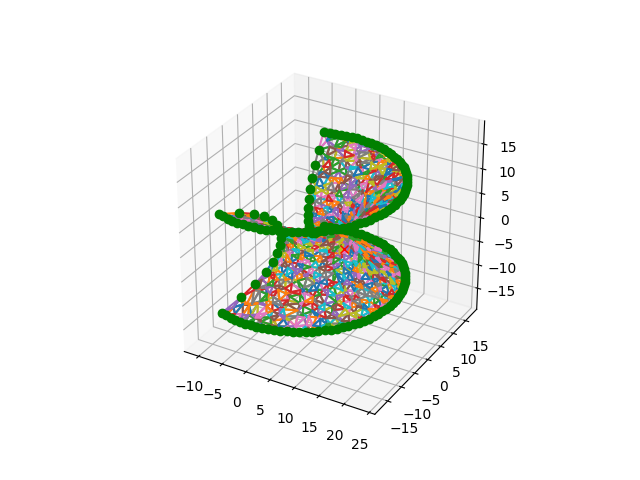

In [11]:
#Drawing the surfaces 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

X = []
Y = []
Z = []
for tr in M.triangles:
    xs = [M.mapping[ind][0] for ind in tr] + [M.mapping[tr[0]][0]]
    ys = [M.mapping[ind][1] for ind in tr] + [M.mapping[tr[0]][1]]
    zs = [M.mapping[ind][2] for ind in tr] + [M.mapping[tr[0]][2]]
    ax.plot(xs,ys,zs)
    
    X = X + list(xs)
    Y = Y + list(ys)
    Z = Z + list(zs)


L = M.mapping[ind]
x = L[0]
y = L[1]
z = L[2]


plt.plot(x,y,z,'x',color='r') 



for k in Outside_vertexes:
    L = M.mapping[k]
    x = L[0]
    y = L[1]
    z = L[2]


    plt.plot(x,y,z,'o',color='green') 


X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)



In [42]:
import pickle
with open('/home/mehdii/projects/def-vidalthi/mehdii/3dPU/3dPU/Plateau_Problem/Triangulation_Meshing/tests/test_catenoid_big.pkl', "wb") as file:
    pickle.dump(M,file)